# Sources

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
    

In [1]:

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [51]:
#Dependencies
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Cross validation
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, GridSearchCV
#ensemble methods
from sklearn import linear_model, tree, ensemble, svm

#gradient coost classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

#Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [3]:
#Uploading data
file_path  = '/Users/pw/Desktop/StatisticalAnalysis/ChurnPredcitiion/customer_data.csv'
df = pd.read_csv(file_path)

In [4]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Missing Values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#A function to check if there are missing values and if so print the count
def missing_value(dataframe):
    if dataframe.isnull().values.any():
        print(dataframe.isnull().sum())
    else:
        print('No missing valuse')

In [7]:
missing_value(df)

No missing valuse


# Exploratory Data Analysis

In [8]:
#Continous variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
#Conversion of data types
df['TotalCharges'] = df['TotalCharges'].replace([' '],[0])
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='raise')

                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.247900      0.826178
MonthlyCharges  0.247900        1.000000      0.651174
TotalCharges    0.826178        0.651174      1.000000


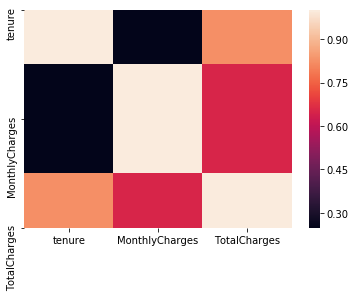

In [10]:
#Heat map to show correlation of the continous variables
heatdf = df.loc[:,['tenure','MonthlyCharges','TotalCharges']]
sns.heatmap(heatdf.corr())
print(heatdf.corr())

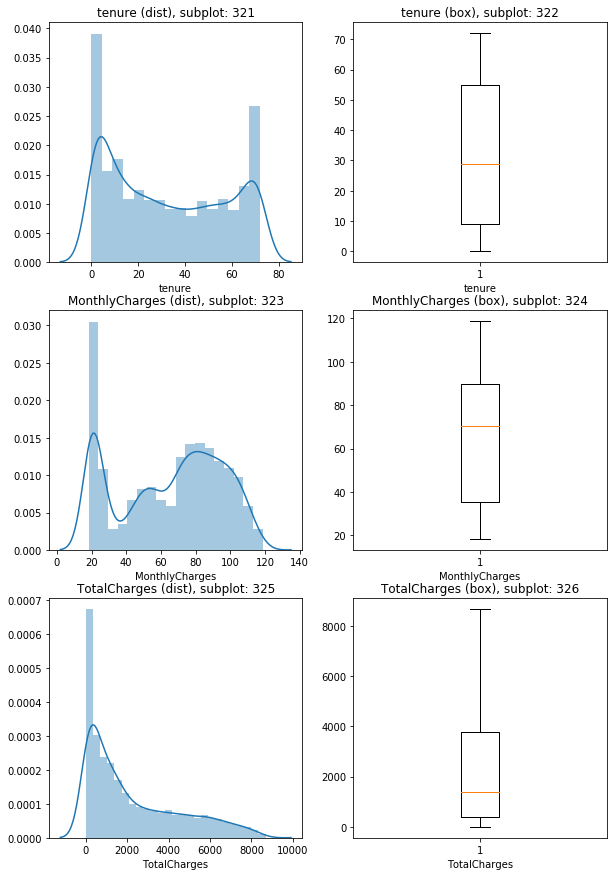

In [11]:
#Distribution Plots of the continous variables
df_num = ['tenure','MonthlyCharges','TotalCharges']

# plot Numerical Data

a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(10,15))

for i in df_num:
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(heatdf[i])
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} (box), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.boxplot(x = heatdf[i])
    c = c + 1

plt.show()

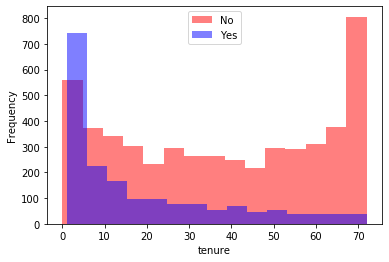

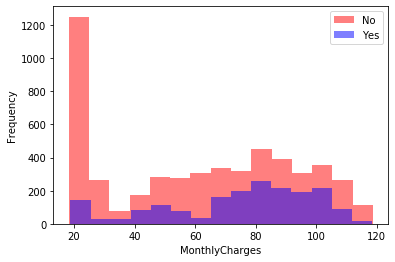

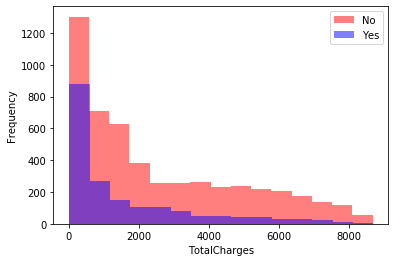

In [12]:
#Distribution of the continous variable with respect to the target variable
for i in df_num:
    
    fig, ax = plt.subplots()

    ax.hist(df[df['Churn']=='No'][i], bins=15, alpha=0.5, color="red", label="No")
    ax.hist(df[df['Churn']=='Yes'][i], bins=15, alpha=0.5, color="blue", label="Yes")

    ax.set_xlabel(i)
    ax.set_ylabel("Frequency")

    ax.legend();

In [13]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace([1,0],['Yes','No'])
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

In [14]:
#Categorical Variables
df_cat = df.select_dtypes(include=['object'])
df_cat = df_cat.drop(columns=['customerID','Churn'])

In [15]:
cat_col = list(df_cat.columns.values)

In [16]:
cat_col

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [17]:
count=0
for i in cat_col:
    count+=1
print(count)

16


No     5174
Yes    1869
Name: Churn, dtype: int64


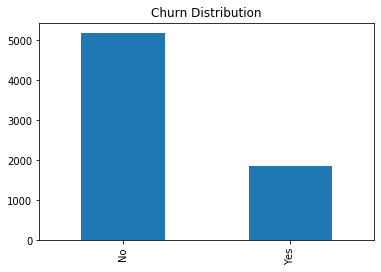

In [18]:
#Target Distribution
df['Churn'].value_counts().plot.bar(title = 'Churn Distribution')
print(df['Churn'].value_counts())

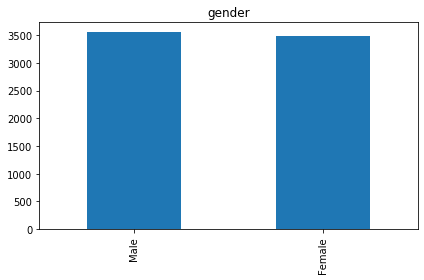

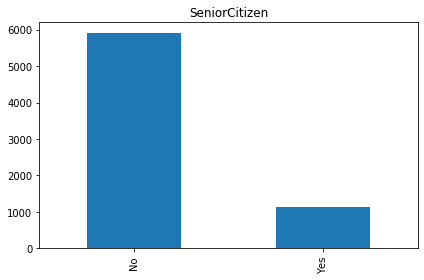

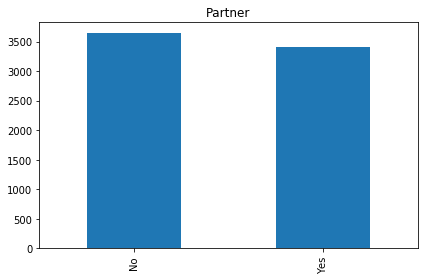

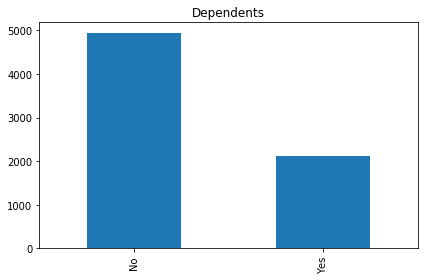

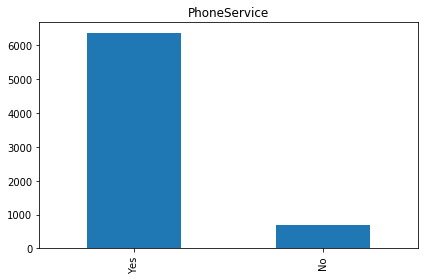

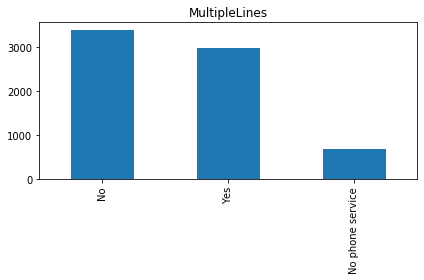

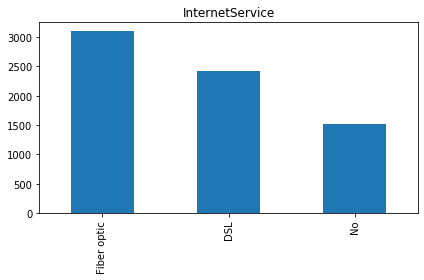

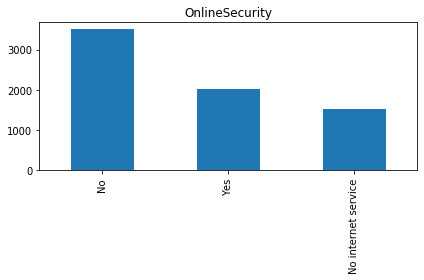

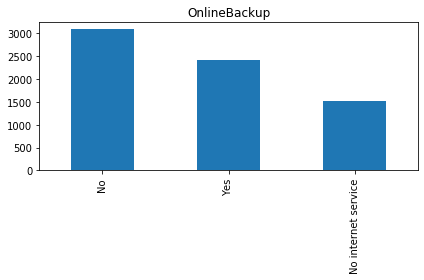

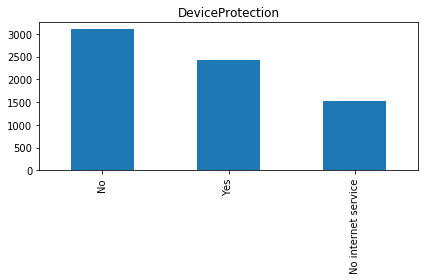

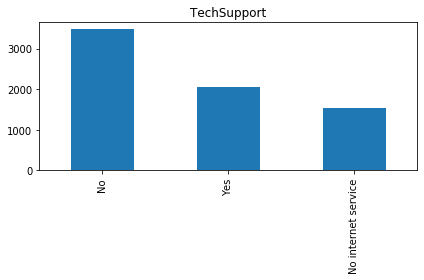

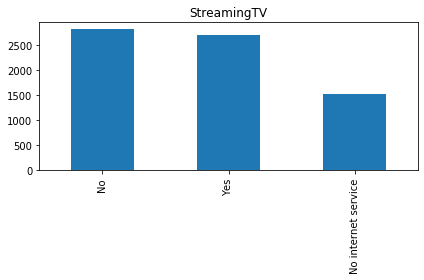

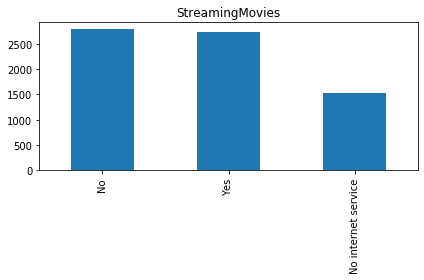

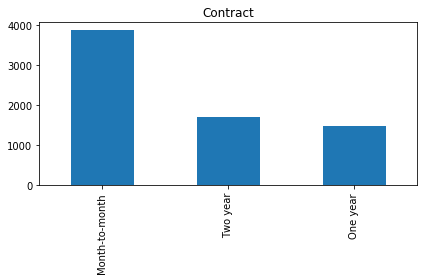

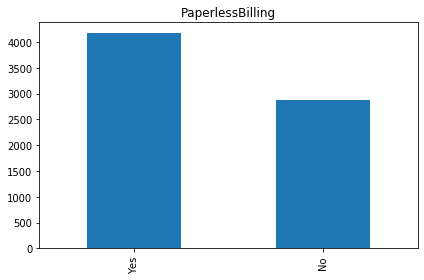

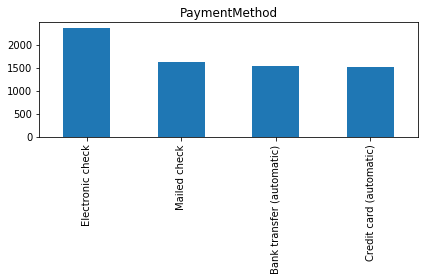

In [19]:
for column in cat_col:
    
    
    df[column].value_counts().plot.bar(title = column)
    plt.tight_layout()
    #plt.xlabel('{}'.format(column))
    plt.show()

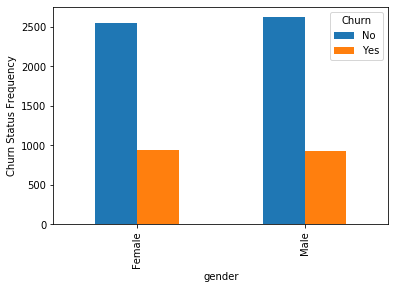

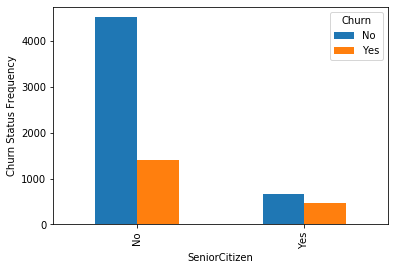

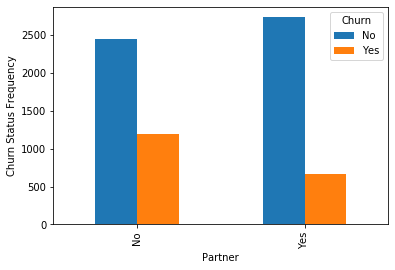

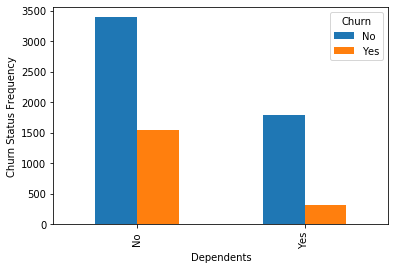

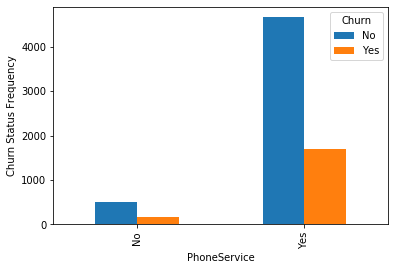

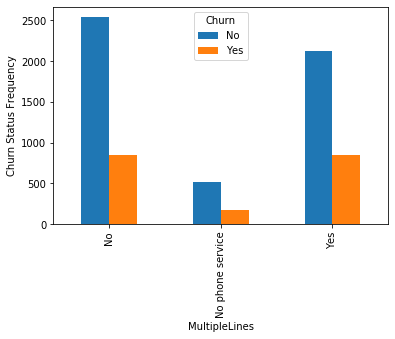

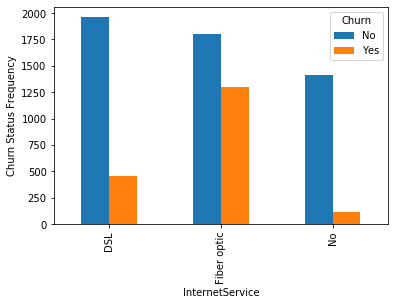

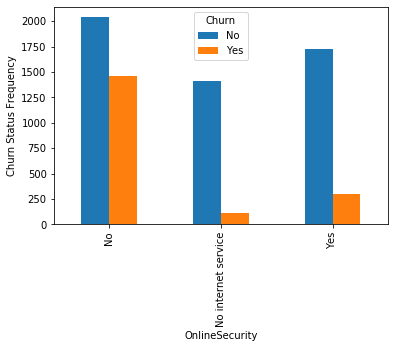

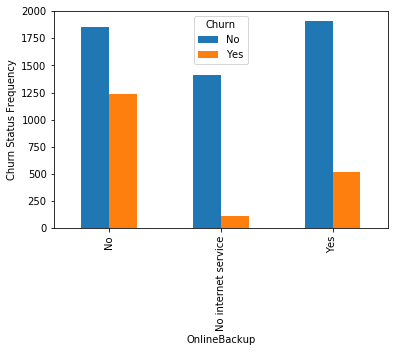

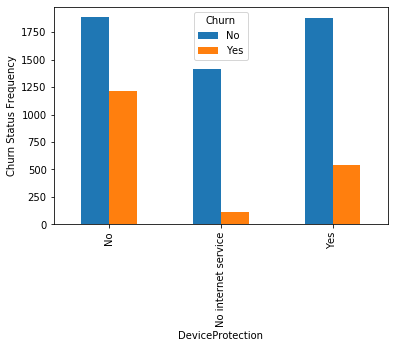

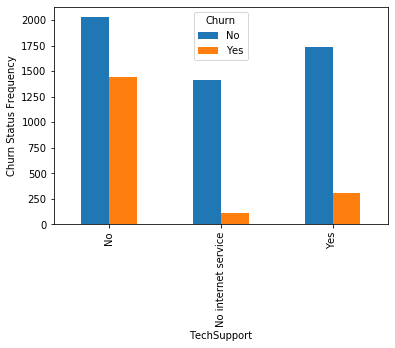

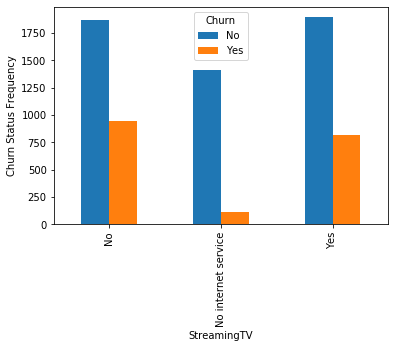

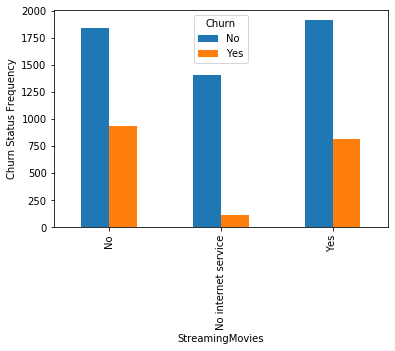

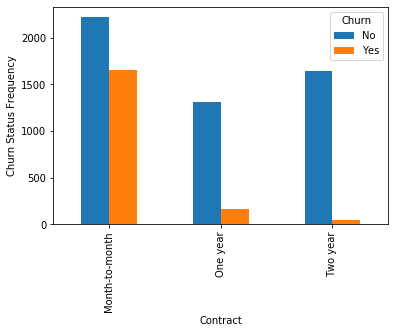

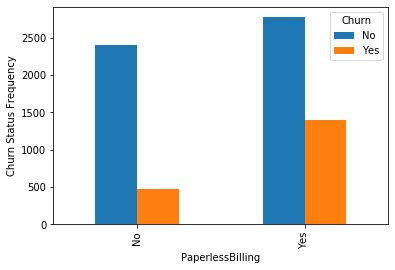

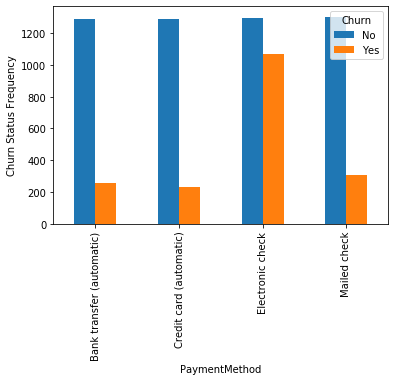

In [20]:
#Cross Tabulation to show distribution of the categorical variable respect to the target variable

for i in cat_col:

    pd.crosstab(df[i], df.Churn).plot(kind = 'bar')
    plt.xlabel('{}'.format(i))
    plt.ylabel('Churn Status Frequency')
    
plt.show()

# Feature Engineering

In [21]:
#Determining number of categories for the categorical values

object_cols = [col for col in df.columns if df[col].dtype == "object"]

# Get number of unique entries in each column with categorical data

object_nunique = list(map(lambda col: df[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order

sorted(d.items(), key=lambda x: x[1])

[('gender', 2),
 ('SeniorCitizen', 2),
 ('Partner', 2),
 ('Dependents', 2),
 ('PhoneService', 2),
 ('PaperlessBilling', 2),
 ('Churn', 2),
 ('MultipleLines', 3),
 ('InternetService', 3),
 ('OnlineSecurity', 3),
 ('OnlineBackup', 3),
 ('DeviceProtection', 3),
 ('TechSupport', 3),
 ('StreamingTV', 3),
 ('StreamingMovies', 3),
 ('Contract', 3),
 ('PaymentMethod', 4),
 ('customerID', 7043)]

In [22]:
#We apply one hot encoding for feature engineering 
for var in cat_col:
    cat_list = 'var' + '_' + 'var'
    cat_list = pd.get_dummies(df[var], prefix=var)
    df_New = pd.concat([df,cat_list],axis = 1)
    df = df_New

data_vars = df.columns.values.tolist()

to_keep = [i for i in data_vars if i not in cat_col]

df_final = df[to_keep]

df_final.columns.values

array(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'SeniorCitizen_No',
       'SeniorCitizen_Yes', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_Month-

# Modelling

In [23]:
df_final['Churn'] = df_final['Churn'].replace(['Yes','No'],[1,0])

df_model =df_final.drop(columns = ['customerID'])

label = np.array(df_model['Churn'])

feature_df = df_model.drop('Churn', axis=1)

#A list of features
feature_list = list(feature_df.columns)

# change the feature dataframe to an array
feature= np.array(feature_df)

In [24]:
#Baseline Logistic Model
feature_train, feature_test, label_train, label_test = train_test_split(feature, label,
                                                                        test_size = 0.2, random_state= 42)


In [25]:
#Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

# Train the model using the training data
rf.fit(feature_train, label_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [26]:
y_pred = rf.predict(feature_test)

In [27]:
acc = accuracy_score(label_test,y_pred)

In [28]:
print('Baseline Model Accuracy: ', acc)

Baseline Model Accuracy:  0.7963094393186657


In [29]:
#Apply k fold cross Validation and try other candidate models
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

count = 1

for train_index, test_index in kf.split(feature,label):
    print(f'Fold:{count}, Train set: {len(train_index)},Validation set:{len(test_index)}')
    count+=1

Fold:1, Train set: 5634,Validation set:1409
Fold:2, Train set: 5634,Validation set:1409
Fold:3, Train set: 5634,Validation set:1409
Fold:4, Train set: 5635,Validation set:1408
Fold:5, Train set: 5635,Validation set:1408


In [30]:
#Random forest after cross validation
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), 
                        feature, label, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.79347055 0.78637331 0.79701916 0.76917614 0.78053977]
Average score: 0.79


In [31]:
#Using Gradient Boosting Classifier
score = cross_val_score(ensemble.GradientBoostingClassifier(random_state= 42), 
                        feature, label, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Gradient Boost Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.81476224 0.80482612 0.80837473 0.78977273 0.80610795]
Gradient Boost Average score: 0.80


# Feature Importance Analysis 

In [32]:
gbc = ensemble.GradientBoostingClassifier(random_state=42)

In [33]:
gbc.fit(feature, label)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [44]:
#Top most important features
col_sorted_by_importance=gbc.feature_importances_.argsort()
feat_imp=pd.DataFrame({
    'cols':feature_df.columns[col_sorted_by_importance],
    'imps':gbc.feature_importances_[col_sorted_by_importance]
})
print(feat_imp.sort_values(by=['imps'], ascending=False).head(10))

                              cols      imps
45         Contract_Month-to-month  0.386886
44                          tenure  0.159009
43     InternetService_Fiber optic  0.086285
42                    TotalCharges  0.078164
41                  MonthlyCharges  0.069741
40               OnlineSecurity_No  0.066771
39                  TechSupport_No  0.043317
38  PaymentMethod_Electronic check  0.039965
37             PaperlessBilling_No  0.012167
36                MultipleLines_No  0.009221


# Selecting the final model

In [48]:
#Getting the best model using Grid Search Cross validation
model = GradientBoostingClassifier(random_state=1)
space = dict()
space['n_estimators'] = [10, 100, 500]
space['max_features'] = [2, 4, 6]
search = GridSearchCV(model,space, scoring='accuracy',cv = kf, refit=True)
result = search.fit(feature_train, label_train)

In [50]:
best_model = result.best_estimator_

#Evaluate the model on the hold out dataset

yhat = best_model.predict(feature_test)

#Accuracy of the final model

acc = accuracy_score(label_test,yhat)
print(f'Best Model Accuracy: {"{:.3f}".format(acc)}')

Best Model Accuracy: 0.814


# Evaluation Metrics

In [52]:
#metrics
print("Confusion Matrix:")
print(confusion_matrix(label_test,yhat))
print()
print("Classification Report")
print(classification_report(label_test,yhat))

Confusion Matrix:
[[941  95]
 [167 206]]

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409



In [57]:
y_scores_gb = gbc.decision_function(feature_test)
fpr_gb, tpr_gb, _ = roc_curve(label_test, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))


Area under ROC curve = 0.89
